<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Итог" data-toc-modified-id="Итог-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Итог</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li><li><span><a href="#Общий-вывод-по-проекту-В2" data-toc-modified-id="Общий-вывод-по-проекту-В2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту В2</b></a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [2]:
#Загрузим данные
data=pd.read_csv('/datasets/insurance.csv')
print(data.head())
print('--------------------------------------')
data.info()
print('--------------------------------------')
data.shape

   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
--------------------------------------


(5000, 5)

In [3]:
#Проверим на пропуски
data.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [4]:
##Выведем дубликаты
dubl=data.duplicated()
print(data[dubl])

      Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
281     1     39.0   48100.0            1                  0
488     1     24.0   32900.0            1                  0
513     0     31.0   37400.0            2                  0
718     1     22.0   32600.0            1                  0
785     0     20.0   35800.0            0                  0
...   ...      ...       ...          ...                ...
4793    1     24.0   37800.0            0                  0
4902    1     35.0   38700.0            1                  0
4935    1     19.0   32700.0            0                  0
4945    1     21.0   45800.0            0                  0
4965    0     22.0   40100.0            1                  0

[153 rows x 5 columns]


**Также выведу матрицу корреляций для того,чтобы показать отсутствие линейной зависимости между признаками и матрица признаков имеет полный ранг. Это нам понадобится для доказательства того,что произведение матрицы признаков и транспонированная матрица признаков является обратимой матрицей**
$$
(X * X^T)
$$

<AxesSubplot:>

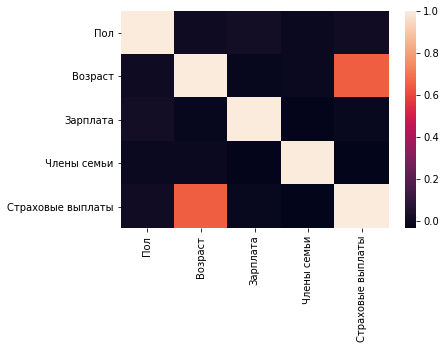

In [5]:
corr = data.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

**Нигде 100й % зависимости между признаками не наблюдается**

*** Предобработка проведена:пропуски отсутствуют,полные дубликаты удалены,все данные соответствуют нужному типу ***

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** После умножения признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:** Доказательство будем проводить через подстановку новых условий в формулу предсказаний и используем ассоциативность матричных операций для преобразования,свойства обратимой матрицы а также свойством обратной матрицы. Какие формулы и свойства нам понадобятся.

Свойства транспонирования 
$$
(AB)^T=B^TA^T   (1)
$$

Свойство обратной матрицы
$$
A(A)^{-1}=E
$$

$$
(ABC)^-1=C^{-1}B^{-1}A^{-1}  (2)
$$

$$
(A^T)^{-1}=(A^{-1})^T        (3)
$$

Едининичная квадратная матрица

$$
EA=AE=A
$$

**Теперь с помощью этих свойств докажем,что умножение матрицы признаков X на произвольную квадратную и обратимую матрицу М не повлияет на предсказания а.**
**Выразим зашифрованные признаки через умножение исходной матрицы признаков на обратимую квадратную матрицу и подставим это значение в формулу обучкения и предсказания.Получаем**

$$
A= XM((XM)^TXM)^{-1}(XM)^Ty
$$

**Пользуемся свойством транспонирования (1) и ассоциативностью матричных операций и преобразуем выражение внутри обратной матрицы.**

$$
A=XM(M^T(X^TX)M)^{-1}(XM)^Ty
$$

**Рассмотрим поподробнее часть нового предсказания,а именно**

$$
(M^T(X^TX)M)^{-1}
$$

**М(а также транспонированная M) у нас по условию квадратная обратимая матрица. Произведение матрицы признаков на себя же транспонированную также является квадратной и обратимой(вспомним матрицу корреляций). Таким образом к этому выражению применимо свойство обратной матрицы (2). Воспользуемся им**

$$
A=XM(M)^{-1}(X^TX)^{-1}M^{-T}M^TX^Ty
$$

**Применим свойство (3) и перезапишем часть произведения**

$$
M^{-T}=(M^T)^{-1}
$$

**Таким образом получим по основному свойству обратной матрицы получаем.**

$$
M(M)^{-1}=E
$$
$$
(M^T)^{-1}M^T=E
$$

**T.е данные части можно сократить,т.к на единичные матрицы не меняют содержание исходной.**
**Запишем формулу после сокращения**
$$
A=X(X^TX)^{-1}X^Ty
$$

**Данная формула соответствует формуле предсказания**
$$
a=Xw=X(X^T X)^{-1} X^T y
$$

## Алгоритм преобразования

**Алгоритм**

1.Генерирование случайной квадратной матрицы размером N на N, где N это количество признаков.

2.Проверка на обратимость.

3.Умножение сгенерированной матрицы и проверенной матрицы на матрицу признаков.

4.Расчет метрики на зашифрованной матрице с исходным целевым признаком.

**Обоснование**

Т.к умножение матрицы признаков на квадратную матрицу с размерностью равной  количеству признаков не повлияет ни на ее размерность, ни на качество регрессии, то такие данные можно использовать для дальнейшего прогнозирования.

## Проверка алгоритма

In [6]:
## Для начала приготовим target и features
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
## Разобьем на трейновую и тестовые выборки
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.25, random_state=12345) 
print('Размер трейна',features_train.shape)
print('Размер тестовой',features_test.shape)

Размер трейна (3750, 4)
Размер тестовой (1250, 4)


In [7]:
# Получим метрику на незашифрованных данных.
model = LinearRegression()
model.fit(features_train,target_train)
predictions = model.predict(features_test)
r2 = r2_score(target_test, predictions)
print(f'Метрика R2 для незашифрованных данных = {r2}')

Метрика R2 для незашифрованных данных = 0.43522757127026546


**Теперь эмпирически проверим наш алгоритм**

In [8]:
###1.Генерирование случайной квадратной матрицы размером 4 * 4

matrix=np.random.normal(size=(features.shape[1],features.shape[1]))
print(matrix)

[[-0.10065519 -1.39820736  0.12675242 -1.51636788]
 [ 1.24512345  0.37326911 -0.63660817 -0.29572526]
 [-0.65230215 -0.53898995  1.12942938  0.02948278]
 [-1.78718866  0.77830706 -0.20367275 -0.46686919]]


In [9]:
###2.Проверка на обратимость.
try:
    inv_matrix=np.linalg.inv(matrix)
    print("Матрица обратима")
except np.linalg.LinAlgError:
    print("Матрица необратима")

Матрица обратима


In [10]:
###3.Умножение сгенерированной матрицы и проверенной матрицы на матрицу признаков.
features_cryp = features.dot(matrix)
features_cryp.head()

,0,1,2,3
0,-32305.024425,-26719.217460,55993.519619,1448.238053
1,-24731.993212,-20463.669470,42888.828965,1106.275514
2,-13662.236571,-11307.964177,23699.555439,610.562406
3,-27178.426442,-22466.485711,47083.429219,1222.288073
4,-16990.323315,-14058.584406,29460.408661,759.703955


In [11]:
###4.Расчет метрики на зашифрованной матрице с исходным целевым признаком.
model = LinearRegression()
features_train_cr, features_test_cr, target_train, target_test = train_test_split(
features_cryp, target, test_size=0.25, random_state=12345)

model.fit(features_train_cr,target_train)
predictions = model.predict(features_test_cr)
r2 = r2_score(target_test, predictions)
print(f'Метрика R2 для зашифрованных данных = {r2}')

Метрика R2 для зашифрованных данных = 0.435227571270312


**Итак метрика R2 на шифрованных и нешифрованных фичах практически равны (разница незначительна и обусловна точностью вычислений с плавающей точкой. Таким образом наш алгоритм показал практически идентичный пезультат и его можно применять для шифрования**

### Итог
1.На первом этапе были загружены данные,проверены на пропуски, дубликаты,проведена проверка на отсутствие линейной зависмости между признаками.

2.Теоретически доказано отсутствие влияние на качество регрессии умножение матрицы признаков на рандомную квадратную обратимую матрицу.

3.Составлен алгоритм шифровки данных.

4.Проведено сравнение метрики R2 на шифрованных и нешифрованных данных. Алгоритм проверку прошел. Метрики близки по значению.